# Splice Dataset

## Summary

## Describe

| Total | Positive | Attributes | Normalized |
|:-----:|:--------:|:----------:|:----------:|
| 3175  |  48.1%   |     60     |   Onehot   |

In [1]:
from utils.dataloader import DataLoader

df = DataLoader('splice').df
df.target.describe()

count    3175.000000
mean        0.480945
std         0.499715
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [2]:
df.describe()

,target,1.0,2.0,3.0,4.0,1.0,2.0,3.0,4.0,1.0,...,3.0,4.0,1.0,2.0,3.0,4.0,1.0,2.0,3.0,4.0
count,3175.000000,3175.000000,3175.000000,3175.000000,3175.000000,3175.000000,3175.000000,3175.000000,3175.000000,3175.000000,...,3175.000000,3175.000000,3175.000000,3175.000000,3175.000000,3175.000000,3175.000000,3175.000000,3175.000000,3175.000000
mean,0.480945,0.232441,0.275276,0.262362,0.229921,0.244094,0.248819,0.268976,0.238110,0.222047,...,0.272441,0.229921,0.246299,0.247244,0.269606,0.236850,0.226772,0.298898,0.245669,0.228661
std,0.499715,0.422455,0.446723,0.439988,0.420848,0.429617,0.432397,0.443498,0.425994,0.415688,...,0.445286,0.420848,0.430923,0.431478,0.443825,0.425217,0.418810,0.457847,0.430551,0.420037
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## With prior equalization

In [12]:
from runner import run

args = {
    'dataset': 'splice', 
    'lr': 0.001, 
    'hidsize': 16, 
    'episodes': 100, 
    'batchsize': 128, 
    'test_size': 0.5,
    'dropout': 0.5,
    'normalize': False,
    'equalize_prior': True,
}

$e_0 = 0, e_1 = 0$

{'dataset': 'splice', 'lr': 0.001, 'hidsize': 16, 'episodes': 100, 'batchsize': 128, 'test_size': 0.5, 'dropout': 0.5, 'normalize': False, 'equalize_prior': True, 'e0': 0, 'e1': 0}


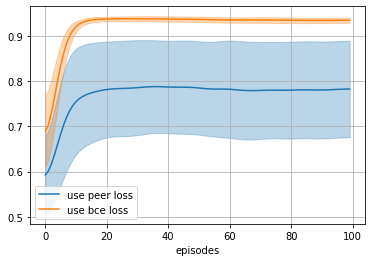

--------------------------------------
| knn                     | 0.758    |
| logistic regression     | 0.93     |
| nn                      | 0.938    |
| nn with peer prediction | 0.788    |
| random forest           | 0.969    |
| svm                     | 0.959    |
--------------------------------------


In [13]:
args.update({'e0': 0, 'e1': 0})
run(args.copy())

{'dataset': 'splice', 'lr': 0.001, 'hidsize': 16, 'episodes': 100, 'batchsize': 128, 'test_size': 0.5, 'dropout': 0.5, 'normalize': True, 'equalize_prior': True, 'e0': 0, 'e1': 0}


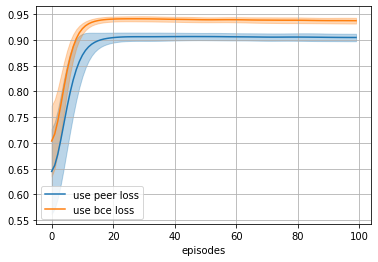

--------------------------------------
| knn                     | 0.758    |
| logistic regression     | 0.93     |
| nn                      | 0.941    |
| nn with peer prediction | 0.907    |
| random forest           | 0.969    |
| svm                     | 0.959    |
--------------------------------------


In [14]:
args['normalize'] = True
run(args.copy())

**So why is normalization so important in this case where the attributes are all onehot-coded ?**

$e_0 = 0.2, e_1 = 0.2$

{'dataset': 'splice', 'lr': 0.001, 'hidsize': 16, 'episodes': 100, 'batchsize': 128, 'test_size': 0.5, 'dropout': 0.5, 'normalize': True, 'equalize_prior': True, 'e0': 0.2, 'e1': 0.2}


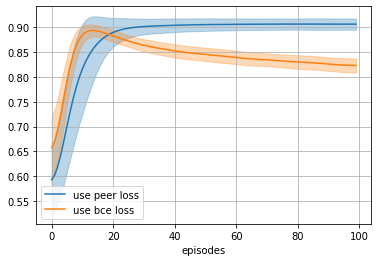

--------------------------------------
| knn                     | 0.707    |
| logistic regression     | 0.876    |
| nn                      | 0.895    |
| nn with peer prediction | 0.906    |
| random forest           | 0.928    |
| svm                     | 0.932    |
--------------------------------------


In [15]:
args.update({'e0': 0.2, 'e1': 0.2})
run(args.copy())

$e_0 = 0.1, e_1 = 0.3$

{'dataset': 'splice', 'lr': 0.001, 'hidsize': 16, 'episodes': 100, 'batchsize': 128, 'test_size': 0.5, 'dropout': 0.5, 'normalize': True, 'equalize_prior': True, 'e0': 0.1, 'e1': 0.3}


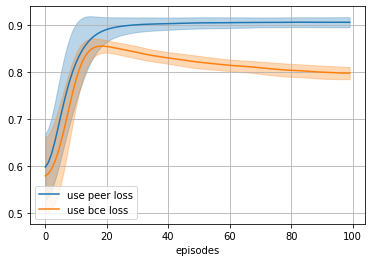

--------------------------------------
| knn                     | 0.727    |
| logistic regression     | 0.847    |
| nn                      | 0.856    |
| nn with peer prediction | 0.906    |
| random forest           | 0.864    |
| svm                     | 0.901    |
--------------------------------------


In [16]:
args.update({'e0': 0.1, 'e1': 0.3})
run(args.copy())

$e_0 = 0.2, e_1 = 0.4$

{'dataset': 'splice', 'lr': 0.001, 'hidsize': 16, 'episodes': 100, 'batchsize': 128, 'test_size': 0.5, 'dropout': 0.5, 'normalize': True, 'equalize_prior': True, 'e0': 0.2, 'e1': 0.4}


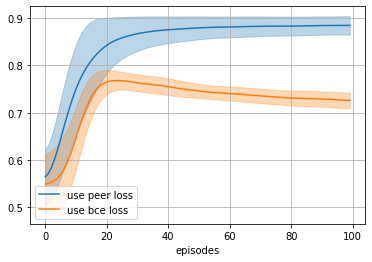

--------------------------------------
| knn                     | 0.657    |
| logistic regression     | 0.772    |
| nn                      | 0.768    |
| nn with peer prediction | 0.884    |
| random forest           | 0.757    |
| svm                     | 0.804    |
--------------------------------------


In [17]:
args.update({'e0': 0.2, 'e1': 0.4})
run(args.copy())

$e_0 = 0.4, e_1 = 0.4$

{'dataset': 'splice', 'lr': 0.001, 'hidsize': 16, 'episodes': 100, 'batchsize': 128, 'test_size': 0.5, 'dropout': 0.5, 'normalize': True, 'equalize_prior': True, 'e0': 0.4, 'e1': 0.4}


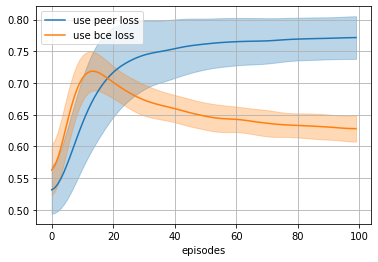

--------------------------------------
| knn                     | 0.582    |
| logistic regression     | 0.687    |
| nn                      | 0.72     |
| nn with peer prediction | 0.771    |
| random forest           | 0.723    |
| svm                     | 0.762    |
--------------------------------------


In [18]:
args.update({'e0': 0.4, 'e1': 0.4})
run(args.copy())

## No prior equalization

In [19]:
from runner import run

args = {
    'dataset': 'splice', 
    'lr': 0.001, 
    'hidsize': 16, 
    'episodes': 100, 
    'batchsize': 128, 
    'test_size': 0.5,
    'dropout': 0.5,
    'normalize': True,
    'equalize_prior': False,
}

$e_0 = 0, e_1 = 0$

{'dataset': 'splice', 'lr': 0.001, 'hidsize': 16, 'episodes': 100, 'batchsize': 128, 'test_size': 0.5, 'dropout': 0.5, 'normalize': True, 'equalize_prior': False, 'e0': 0, 'e1': 0}


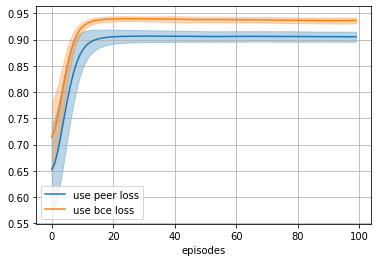

--------------------------------------
| knn                     | 0.765    |
| logistic regression     | 0.933    |
| nn                      | 0.94     |
| nn with peer prediction | 0.907    |
| random forest           | 0.972    |
| svm                     | 0.962    |
--------------------------------------


In [20]:
args.update({'e0': 0, 'e1': 0})
run(args.copy())

$e_0 = 0.2, e_1 = 0.2$

{'dataset': 'splice', 'lr': 0.001, 'hidsize': 16, 'episodes': 100, 'batchsize': 128, 'test_size': 0.5, 'dropout': 0.5, 'normalize': True, 'equalize_prior': False, 'e0': 0.2, 'e1': 0.2}


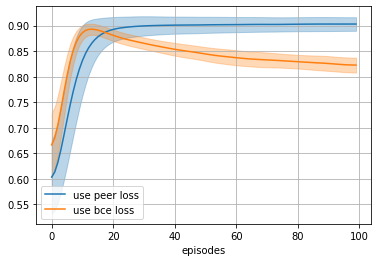

--------------------------------------
| knn                     | 0.715    |
| logistic regression     | 0.878    |
| nn                      | 0.894    |
| nn with peer prediction | 0.903    |
| random forest           | 0.932    |
| svm                     | 0.937    |
--------------------------------------


In [21]:
args.update({'e0': 0.2, 'e1': 0.2})
run(args.copy())

$e_0 = 0.1, e_1 = 0.3$

{'dataset': 'splice', 'lr': 0.001, 'hidsize': 16, 'episodes': 100, 'batchsize': 128, 'test_size': 0.5, 'dropout': 0.5, 'normalize': True, 'equalize_prior': False, 'e0': 0.1, 'e1': 0.3}


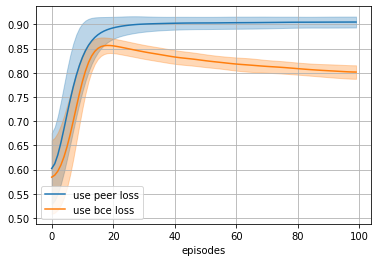

--------------------------------------
| knn                     | 0.737    |
| logistic regression     | 0.851    |
| nn                      | 0.857    |
| nn with peer prediction | 0.905    |
| random forest           | 0.868    |
| svm                     | 0.904    |
--------------------------------------


In [22]:
args.update({'e0': 0.1, 'e1': 0.3})
run(args.copy())

$e_0 = 0.2, e_1 = 0.4$

{'dataset': 'splice', 'lr': 0.001, 'hidsize': 16, 'episodes': 100, 'batchsize': 128, 'test_size': 0.5, 'dropout': 0.5, 'normalize': True, 'equalize_prior': False, 'e0': 0.2, 'e1': 0.4}


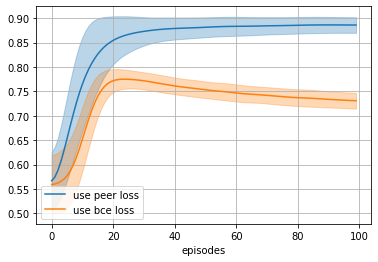

--------------------------------------
| knn                     | 0.666    |
| logistic regression     | 0.777    |
| nn                      | 0.775    |
| nn with peer prediction | 0.886    |
| random forest           | 0.759    |
| svm                     | 0.813    |
--------------------------------------


In [23]:
args.update({'e0': 0.2, 'e1': 0.4})
run(args.copy())

$e_0 = 0.4, e_1 = 0.4$

{'dataset': 'splice', 'lr': 0.001, 'hidsize': 16, 'episodes': 100, 'batchsize': 128, 'test_size': 0.5, 'dropout': 0.5, 'normalize': True, 'equalize_prior': False, 'e0': 0.4, 'e1': 0.4}


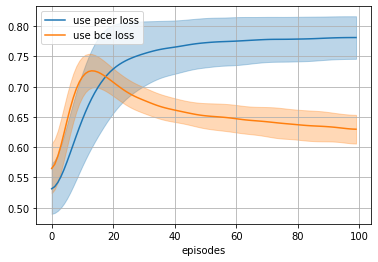

--------------------------------------
| knn                     | 0.582    |
| logistic regression     | 0.69     |
| nn                      | 0.728    |
| nn with peer prediction | 0.781    |
| random forest           | 0.727    |
| svm                     | 0.767    |
--------------------------------------


In [24]:
args.update({'e0': 0.4, 'e1': 0.4})
run(args.copy())